In [2]:
import numpy as np
import pandas as pd
import seaborn
import json
import glob, os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

path_to_folder = "../../Simulation_Logs/"

In [3]:
subjects = glob.glob(path_to_folder + "*/")

In [4]:
types = ["Controller_FPS_Path_1",
         "Controller_FPS_Path_2",
         "Controller_FPS_Path_3",
         "Controller_TPS_Path_1",
         "Controller_TPS_Path_2",
         "Controller_TPS_Path_3",
         "MotionCapture_FPS_Path_1",
         "MotionCapture_FPS_Path_2",
         "MotionCapture_FPS_Path_3",
         "MotionCapture_TPS_Path_1",
         "MotionCapture_TPS_Path_2",
         "MotionCapture_TPS_Path_3"]

logs = {}
for curr in types:
    logs[curr] = []

In [5]:
for subject in subjects:
    print(subject)
    files = glob.glob(subject+"*.json")
    for idx,file in enumerate(files):
        for cur_type in types:
            # to take only file name without path and .json extension
            if os.path.basename(file)[:-5] == cur_type:
                with open(file) as f:
                    temp = []
                    for line in f:
                        temp.append(json.loads(line))
                df = pd.io.json.json_normalize(temp[0]['allLogs'])
                df.columns = df.columns.map(lambda x: x.split("*.")[-1])
                logs[cur_type].append(df)

../../Simulation_Logs\Max\
../../Simulation_Logs\Pseudo\
../../Simulation_Logs\Timothee\


In [6]:
def define_plot_pos(ax):
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_zlabel('z (m)')
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    ax.set_zlim(0,6)
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


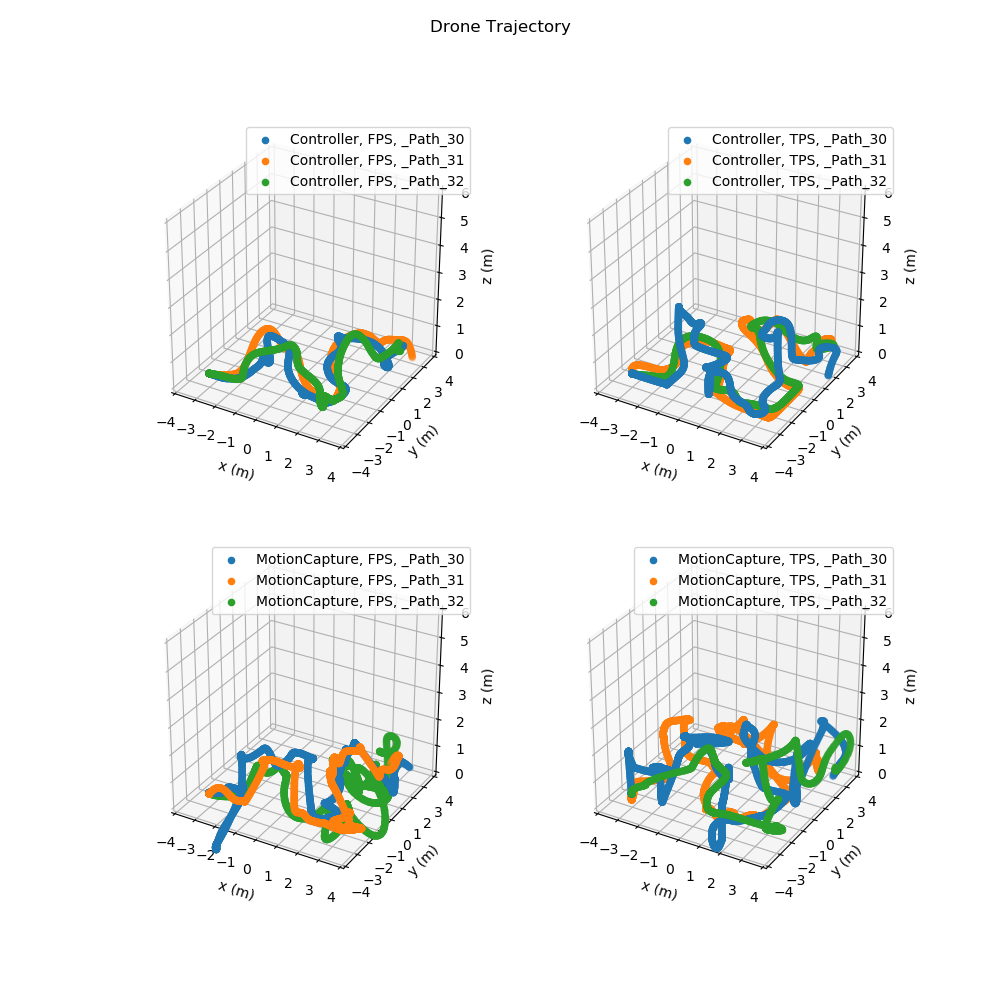

In [7]:
path = "_Path_3"
fig = plt.figure(figsize=(10,10))


ax = fig.add_subplot(221, projection='3d')
for idx,log in enumerate(logs['Controller_FPS'+path]):
    ax.scatter(log['dronePosition.x'],log['dronePosition.z'],log['dronePosition.y'], label='Controller, FPS, '+path+str(idx))
define_plot_pos(ax)

ax = fig.add_subplot(222, projection='3d')
for idx,log in enumerate(logs['Controller_TPS'+path]):
    ax.scatter(log['dronePosition.x'],log['dronePosition.z'],log['dronePosition.y'], label='Controller, TPS, '+path+str(idx))
define_plot_pos(ax)

ax = fig.add_subplot(223, projection='3d')
for idx,log in enumerate(logs['MotionCapture_FPS'+path]):
    ax.scatter(log['dronePosition.x'],log['dronePosition.z'],log['dronePosition.y'], label='MotionCapture, FPS, '+path+str(idx))
define_plot_pos(ax)

ax = fig.add_subplot(224, projection='3d')
for idx,log in enumerate(logs['MotionCapture_TPS'+path]):
    ax.scatter(log['dronePosition.x'],log['dronePosition.z'],log['dronePosition.y'], label='MotionCapture, TPS, '+path+str(idx))
define_plot_pos(ax)

fig.suptitle('Drone Trajectory')
plt.show()



In [8]:
def define_plot_col(ax):
    plt.xlabel('Time (s)')
    plt.ylabel('Collisions (bool)')
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


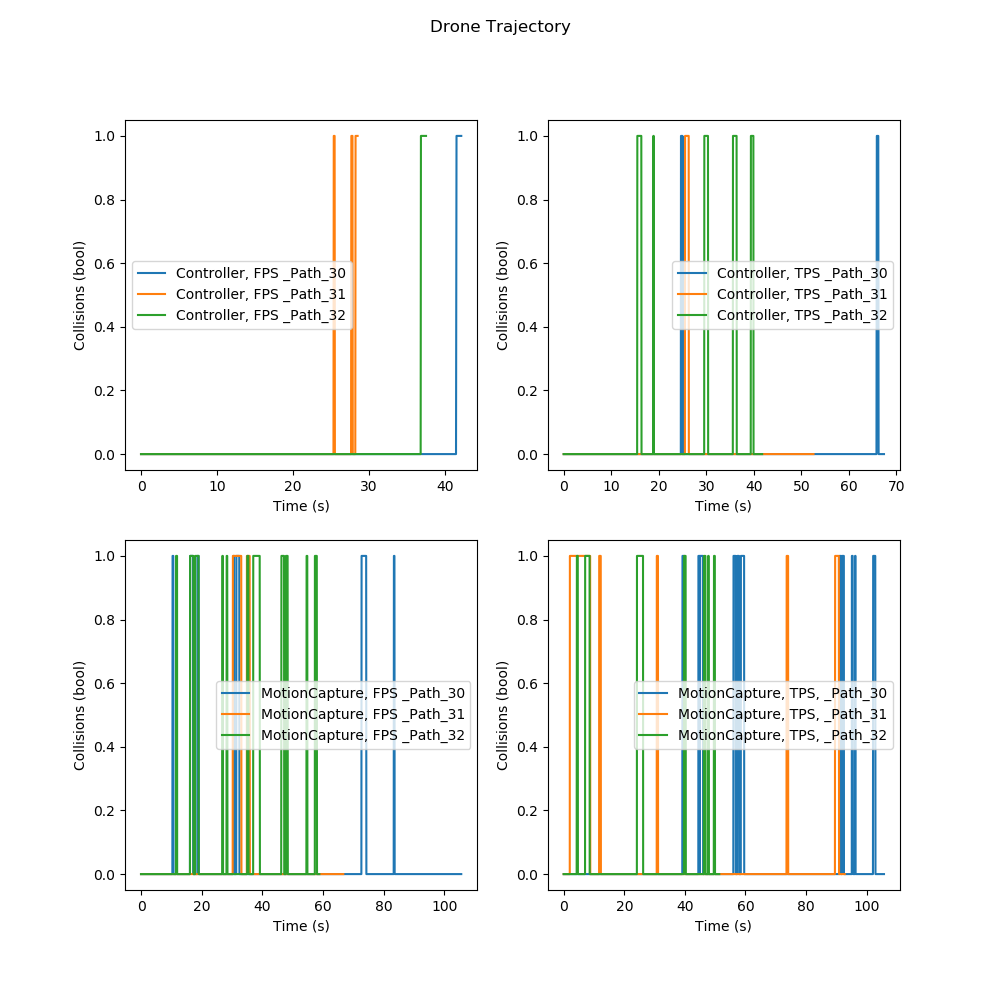

In [9]:
path = "_Path_3"
fig = plt.figure(figsize=(10,10))


ax = fig.add_subplot(221)
for idx,log in enumerate(logs['Controller_FPS'+path]):
    ax.plot(log['absoluteTime'],log['collision'], label='Controller, FPS '+path+str(idx))
define_plot_col(ax)

ax = fig.add_subplot(222)
for idx,log in enumerate(logs['Controller_TPS'+path]):
    ax.plot(log['absoluteTime'],log['collision'], label='Controller, TPS '+path+str(idx))
define_plot_col(ax)

ax = fig.add_subplot(223)
for idx,log in enumerate(logs['MotionCapture_FPS'+path]):
    ax.plot(log['absoluteTime'],log['collision'], label='MotionCapture, FPS '+path+str(idx))
define_plot_col(ax)

ax = fig.add_subplot(224)
for idx,log in enumerate(logs['MotionCapture_TPS'+path]):
    ax.plot(log['absoluteTime'],log['collision'], label='MotionCapture, TPS, '+path+str(idx))
define_plot_col(ax)

fig.suptitle('Drone Trajectory')
plt.show()

